# Exercise 8

In [36]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.stats import uniform

### 13.
Let $X_1, \ldots, X_n$ be independent and identically distributed random variables having unknown mean $\mu$. For given constants $a < b$, we are interested in estimating  
$$
p = P\left( a < \frac{1}{n} \sum_{i=1}^n X_i / n - \mu < b \right).
$$

**(a)** Explain how we can use the bootstrap approach to estimate $p$.  
**(b)** Estimate $p$ if $n = 10$ and the values of the $X_i$ are:  
56, 101, 78, 67, 93, 87, 64, 72, 80, and 69.  
Take $a = -5$, $b = 5$.

In [37]:
xi = np.array([56, 101, 78, 67, 93, 87, 64, 72, 80, 69])
n = 10
a = -5
b = 5

bootstrap_samples = np.random.choice(xi, size=(10, 10))

print(bootstrap_samples)

mu = np.mean(bootstrap_samples, axis=1)

print(mu)

print(np.sum(bootstrap_samples / n - mu, axis=1) / n)

[[ 80  80  56  64  69  56 101  78  93  67]
 [101  56  67  87  80  80 101  87  56  64]
 [101  69  78  80  69  56  69  93  69 101]
 [ 87  93  78  64  72  67  80  69  67  93]
 [ 56  80  69  78  80  87  69 101 101  87]
 [ 64 101  93  64 101  78  56  87  64  78]
 [101  67  56  78  80  93  93  67  56  78]
 [ 64  56  80 101  67  72  69  80 101  93]
 [ 69  80  87  93 101  93  80  72  72  93]
 [ 64  67  67  93  93 101  87  69  78  72]]
[74.4 77.9 78.5 77.  80.8 78.6 76.9 78.3 84.  79.1]
[-71.11 -70.76 -70.7  -70.85 -70.47 -70.69 -70.86 -70.72 -70.15 -70.64]


In the following three exercises $X_1, \ldots, X_n$ is a sample from a distribution whose variance is (the unknown) $\sigma^2$. We are planning to estimate $\sigma^2$ by the sample variance  
$$
S^2 = \frac{1}{n-1} \sum_{i=1}^n (X_i - \bar{X})^2,
$$  
and we want to use the bootstrap technique to estimate $\text{Var}(S^2)$.

### 15.
If $n = 15$ and the data are:  
5, 4, 9, 6, 21, 17, 11, 10, 7, 10, 21, 15, 13, 16, 8  

approximate (by a simulation) the bootstrap estimate of $\text{Var}(S^2)$.

In [41]:
def bootstrap_variance(data):
    bootstrap_samples = np.random.choice(data, size=(100, data.shape[0]))
    medians = np.median(bootstrap_samples, axis=1)
    means = np.mean(bootstrap_samples, axis=1)

    return np.var(medians), np.var(means)

In [39]:
def sample_pareto(n, k, beta):
    us = uniform.rvs(size=n)
    return beta * us ** (-1/k)


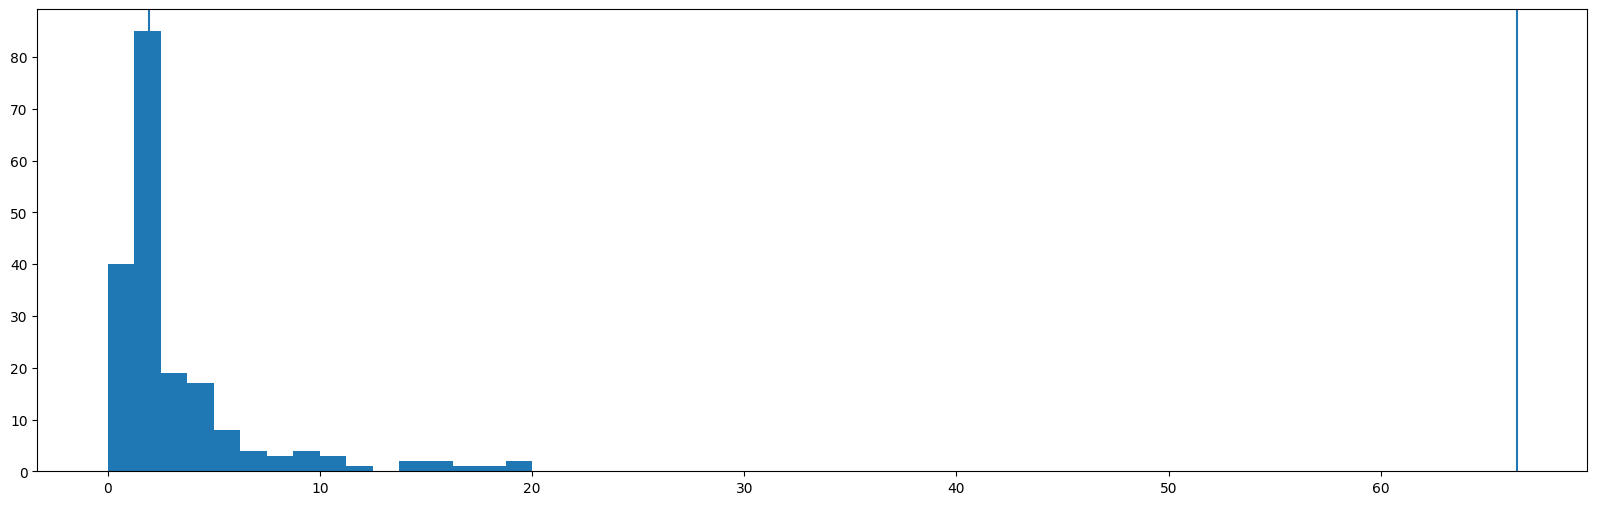

In [73]:
samples = sample_pareto(200, k=1.05, beta=1)

mean = np.mean(samples)
median = np.median(samples)

median_var, mean_var = bootstrap_variance(samples)

fig, ax = plt.subplots(1, 1, figsize=(20, 6))
ax.hist(samples, range=(0, 25), bins=20)
ax.axvline(mean)
ax.axvline(median)